#**TableNet: Deep Learning model for end-to-end Table detection and data extraction from Scanned Document Images** 

## **Business Problem**
Nowadays, there are lots of documents, applications used in many
institutions and organisations like banks, schools,colleges etc.From
storing customer's details to collecting scanned copies of documents, tablular information
is widely used. Retrieving and storing the tabular data from these
documents is a tedious task.<br>
The case study aims to create a Table extracting tool to make the
process more efficient and productive. It focuses on fetching and
accessing of data from tabular forms.

## **Dataset**
We will be using the marmot dataset for tabular information.
https://www.icst.pku.edu.cn/cpdp/docs/20190424190300041510.zip<br>

The dataset consists of Scanned images (in bmp format) of tabular information and their respective table annotations in terms of xml files.

## **Performance Metric**
Accuracy should be considered to check the performance of the model

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,439 kB/s)
debconf: unable to initi

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input, Concatenate, UpSampling2D
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
import xml.etree.ElementTree as ET
from pathlib import Path

In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import numpy as np
import pytesseract
import re

In [21]:
img = Image.open("/content/drive/MyDrive/Marmot_data.zip/10.1.1.1.2006_3.bmp")

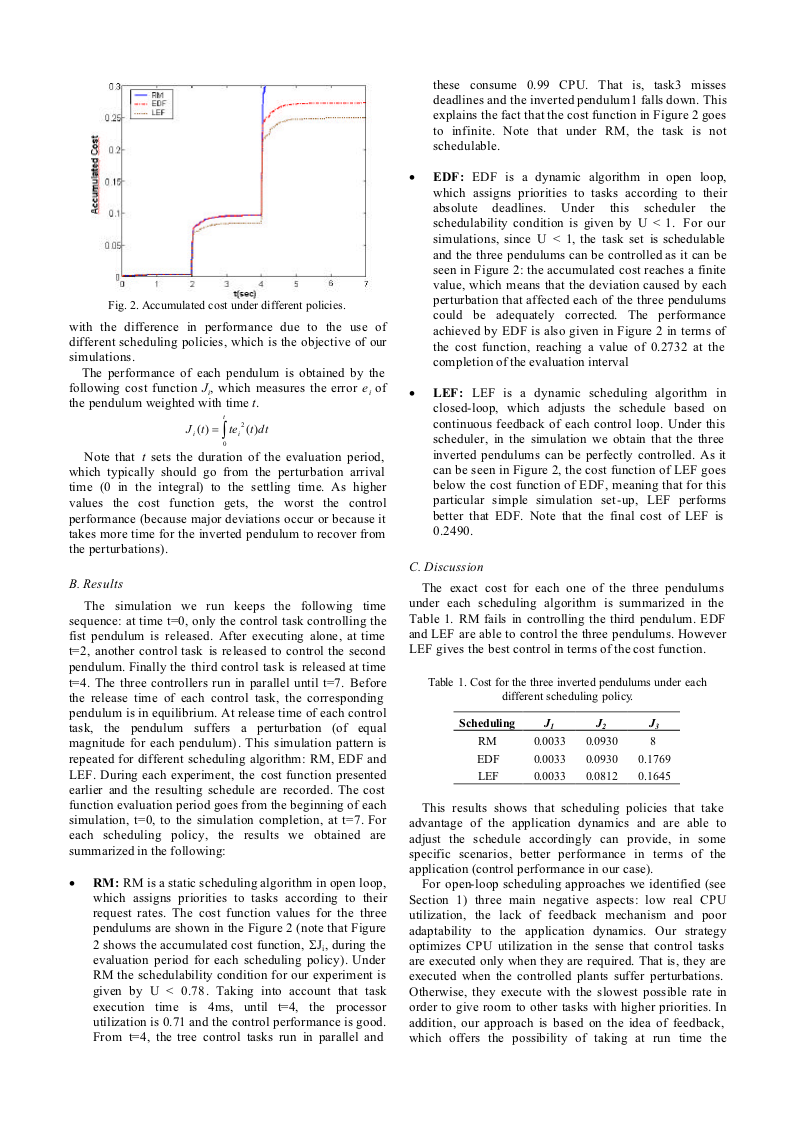

In [ ]:
img

In [ ]:
img.size

(1024, 1024)

In [ ]:
img = resize(img)

In [ ]:
#https://stackoverflow.com/questions/21517879/python-pil-resize-all-images-in-a-folder
from PIL import Image
import os, sys

path = ('/content/drive/MyDrive/Marmot_data.zip/')

def resize_img(path):
  for item in os.listdir(path):
    if os.path.isfile(path+item):
        if item.endswith(".bmp"):
          im = Image.open(path+item)
          f, e = os.path.splitext(item)
          imResize = im.resize((1024,1024), Image.ANTIALIAS)
          #print(imResize)
          imResize.save("/content/drive/MyDrive/Marmot_data.zip/images/"+ f + '.jpeg', quality=90)

resize_img(path)

In [ ]:
# Creating an XML Parser
path = "/content/drive/MyDrive/Marmot_data.zip/"

df = pd.DataFrame()
data =pd.DataFrame()
for file in os.listdir(path):
  filename = os.fsdecode(file)

  if filename.endswith(".xml"):
       file_name=os.path.join(path, filename)
       
       parser = ET.XMLParser(encoding="utf-8")
       targetTree = ET.parse(file_name, parser=parser)
       rootTag = targetTree.getroot()

       name=rootTag.getchildren()[1].text
       depth=int(rootTag.getchildren()[4][2].text)
       width = int(rootTag.getchildren()[4][0].text)
       height = int(rootTag.getchildren()[4][1].text)

       xmin=[]
       ymin=[]
       xmax=[]
       ymax=[]

       for column in rootTag.findall('object'):
         for bnd in column.findall('bndbox'):
           for x in bnd.findall('xmin'):
             xmin.append(x.text)

       for column in rootTag.findall('object'):
         for bnd in column.findall('bndbox'):
           for x in bnd.findall('ymin'):
             ymin.append(x.text)

       for column in rootTag.findall('object'):
         for bnd in column.findall('bndbox'):
           for x in bnd.findall('xmax'):
             xmax.append(x.text)

       for column in rootTag.findall('object'):
         for bnd in column.findall('bndbox'):
           for x in bnd.findall('ymax'):
             ymax.append(x.text)


       my_dict = dict({'filename': name, 'Width': width, 'Height':height,'Depth' : depth,'xmin':xmin,'ymin':ymin,'xmax':xmax,'ymax':ymax})
            
    

       df=pd.DataFrame.from_dict(my_dict)
  data = data.append(df)

In [ ]:
data

,filename,Width,Height,Depth,xmin,ymin,xmax,ymax
0,10.1.1.8.2180_3.bmp,816,1056,1,80,98,257,193
1,10.1.1.8.2180_3.bmp,816,1056,1,272,98,327,197
2,10.1.1.8.2180_3.bmp,816,1056,1,334,95,375,197
3,10.1.1.8.2180_3.bmp,816,1056,1,438,94,646,191
4,10.1.1.8.2180_3.bmp,816,1056,1,657,95,694,191
...,...,...,...,...,...,...,...,...
4,10.1.1.8.2185_14.bmp,816,1056,1,386,292,401,372
5,10.1.1.8.2185_14.bmp,816,1056,1,414,291,442,373
6,10.1.1.8.2185_14.bmp,816,1056,1,451,291,494,371
7,10.1.1.8.2185_14.bmp,816,1056,1,510,290,537,371


In [ ]:
# Generating Masks for table and columns

for i in data['filename'].unique():
    
    f, e = os.path.splitext(i)
    
    width=int(data[data['filename']==i]['Width'].unique())
    height=int(data[data['filename']==i]['Height'].unique())

    xmin=data[data['filename']==i]['xmin'].to_list()
    ymin=data[data['filename']==i]['ymin'].to_list()
    xmax=data[data['filename']==i]['xmax'].to_list()
    ymax=data[data['filename']==i]['ymax'].to_list()


    column_mask = np.zeros((height, width), dtype=np.int32)
    table_mask = np.zeros((height, width), dtype=np.int32)
        
    table_mask[int(min(ymin)):int(max(ymax)), int(min(xmin)):int(max(xmax))] = 255

    for j in range(0,len(xmin)):
        column_mask[int(ymin[j]):int(ymax[j]), int(xmin[j]):int(xmax[j])] = 255
        
    im_col = Image.fromarray(column_mask.astype(np.uint8),'L')
    im_table = Image.fromarray(table_mask.astype(np.uint8),'L')
    im_col.save('/content/drive/MyDrive/Marmot_data.zip/column_mask/'+ f + ".jpeg")
    im_table.save('/content/drive/MyDrive/Marmot_data.zip/table_mask/' + f + ".jpeg")

# **Tablenet Model**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input, Concatenate, UpSampling2D
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np


In [ ]:
#https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

inputShape = (1024, 1024, 3)


inputs = Input(shape=inputShape, name='input')
model_vgg19_conv = VGG19(input_tensor=inputs,weights='imagenet', include_top=False , pooling=None)
model_vgg19_conv.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1024, 1024, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 1024, 1024, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 1024, 1024, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 512, 512, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 512, 512, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 512, 512, 128)     147584    
______________________________________________________________

In [ ]:
model_vgg19_conv.output_shape

(None, 32, 32, 512)

In [ ]:
block3_pool=model_vgg19_conv.get_layer('block3_pool').output
print(block3_pool.get_shape)
block4_pool=model_vgg19_conv.get_layer('block4_pool').output
print(block4_pool.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 128, 128, 256) dtype=float32 (created by layer 'block3_pool')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 64, 64, 512) dtype=float32 (created by layer 'block4_pool')>>


In [ ]:
x = model_vgg19_conv.output

x = Conv2D(512,(1,1),activation = "relu", name = "conv2d_1")(x)

x = Dropout(0.8, name='block6_dropout1')(x)

x = Conv2D(512,(1,1),activation = "relu", name = "conv2d_2")(x)

x = Dropout(0.8, name='block6_dropout2')(x)



In [ ]:
x.get_shape

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 32, 32, 512) dtype=float32 (created by layer 'block6_dropout2')>>

In [ ]:
model_vgg19_conv.get_layer('block5_pool').output

<KerasTensor: shape=(None, 32, 32, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
model_vgg19_conv.output

<KerasTensor: shape=(None, 32, 32, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
#decoder for table mask
def decoder_table(input_layer):
  
  conv7_table  = Conv2D(512, (1, 1), activation = 'relu', name='conv7_table')(input_layer)
  conv7_table_up= UpSampling2D(size=(2, 2))(conv7_table)

  concat1=Concatenate()([conv7_table_up,block4_pool])
  x = UpSampling2D(size=(2, 2))(concat1)

  concat2=Concatenate()([x,block3_pool])
  x = UpSampling2D(size=(2,2),name='table_op')(concat2)
  x = UpSampling2D(size=(2,2))(x)

  final_layer = tf.keras.layers.Conv2DTranspose(3, 3, strides=2,padding='same', name='table_mask')
  x=final_layer(x)  

  return x

#decoder for column mask
def decoder_column(input_layer):
  conv7_col = Conv2D(512, (1, 1), activation = 'relu', name='conv7_col')(input_layer)
  conv7_col = Dropout(0.8, name='block7_dropout_col')(conv7_col)

  conv8_col = Conv2D(512, (1, 1), activation = 'relu', name='conv8_col')(conv7_col)
  conv8_col = UpSampling2D(size=(2, 2))(conv8_col)

  concat1=Concatenate()([conv8_col,block4_pool])
  concat1 = UpSampling2D(size=(2, 2))(concat1)
    
  concat2=Concatenate()([concat1,block3_pool])
  concat2 = UpSampling2D(size=(2,2),name='column_op')(concat2)
    
  final = UpSampling2D(size=(2,2))(concat2)

  final_layer = tf.keras.layers.Conv2DTranspose(3, 3, strides=2,padding='same', name='column_mask')

  final = final_layer(final)

  return final


In [ ]:
table_mask = decoder_table(x)
column_mask = decoder_column(x)

In [ ]:
model = Model(inputs=inputs,outputs=[table_mask, column_mask],name="tablenet")

# **Data Preparation**

The following code has been done with reference to the blog:https://yann-leguilly.gitlab.io/post/2019-12-14-tensorflow-tfdata-segmentation/

In [9]:
def parse_image(img_path):
    """Load an image and its annotation (mask) and returning
    a dictionary.

    Parameters
    ----------
    img_path : str
        Image (not the mask) location.

    Returns
    -------
    dict
        Dictionary mapping an image and its annotation.
    """
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image =tf.image.resize(image, [1024, 1024])
    image = tf.cast(image, tf.float32) / 255.0
    #image = tf.image.convert_image_dtype(image, tf.uint8)

    # For one Image path:
    # /content/drive/MyDrive/Marmot_data.zip/images/10.1.1.1.2006_3.jpeg
    # Its corresponding table mask path is:
    #  /content/drive/MyDrive/Marmot_data.zip/table_mask/10.1.1.1.2006_3.jpeg
    # Its corresponding column mask path is:
    #  /content/drive/MyDrive/Marmot_data.zip/column_mask/10.1.1.1.2006_3.jpeg

    table_mask_path = tf.strings.regex_replace(img_path, "images", "table_mask")
    table_mask = tf.io.read_file(table_mask_path)

    # The masks contain a class index for each pixels
    table_mask = tf.image.decode_jpeg(table_mask, channels=1)
    table_mask =tf.image.resize(table_mask, [1024, 1024])
    table_mask = tf.cast(table_mask, tf.float32) / 255.0


    column_mask_path = tf.strings.regex_replace(img_path, "images", "column_mask")
    column_mask = tf.io.read_file(column_mask_path)

    # The masks contain a class index for each pixels
    column_mask = tf.image.decode_jpeg(column_mask, channels=1)
    column_mask =tf.image.resize(column_mask, [1024, 1024])
    column_mask = tf.cast(column_mask, tf.float32) / 255.0


  
    return image, {'table_mask':table_mask,'column_mask':column_mask}

In [ ]:
total_size = len(list("/content/drive/MyDrive/Marmot_data.zip/images/*jpeg"))

In [ ]:
len_of_train = int(0.9 * total_size)
test_size = int(0.1 * total_size)


In [ ]:
data = tf.data.Dataset.list_files("/content/drive/MyDrive/Marmot_data.zip/images/*jpeg")
train = data.take(len_of_train)
test = data.skip(len_of_train)

In [ ]:
train = train.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = test.map(parse_image)

In [ ]:
BATCH_SIZE = 3

# for reference about the BUFFER_SIZE in shuffle:
# https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle

BUFFER_SIZE = 1000

STEPS_PER_EPOCH = len_of_train // BATCH_SIZE

dataset = {"train": train, "test": test}

# -- Train Dataset --#

dataset['train'] = dataset['train'].shuffle(buffer_size=BUFFER_SIZE)
dataset['train'] = dataset['train'].batch(BATCH_SIZE)
dataset['train'] = dataset['train'].repeat()
dataset['train'] = dataset['train'].prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#-- test Dataset --#

dataset['test'] = dataset['test'].repeat()
dataset['test'] = dataset['test'].batch(BATCH_SIZE)


print(dataset['train'])
print(dataset['test'])

train_dataset = dataset['train']
test_dataset = dataset['test']

<PrefetchDataset shapes: ((None, 1024, 1024, 3), {table_mask: (None, 1024, 1024, 1), column_mask: (None, 1024, 1024, 1)}), types: (tf.float32, {table_mask: tf.float32, column_mask: tf.float32})>
<BatchDataset shapes: ((None, 1024, 1024, 3), {table_mask: (None, 1024, 1024, 1), column_mask: (None, 1024, 1024, 1)}), types: (tf.float32, {table_mask: tf.float32, column_mask: tf.float32})>


In [ ]:
train_dataset

<PrefetchDataset shapes: ((None, 1024, 1024, 3), {table_mask: (None, 1024, 1024, 1), column_mask: (None, 1024, 1024, 1)}), types: (tf.float32, {table_mask: tf.float32, column_mask: tf.float32})>

In [10]:
def display(display_list):
  """Show side-by-side an input image,
    the table and column mask.
    """
    
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'Table Mask', 'Column Mask']

  for i in range(len(display_list)):
    #print("i:",i)
      plt.subplot(1, len(display_list), i+1)
      plt.title(title[i])
      plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
      plt.axis('off')
  plt.show()

(1024, 1024, 3)


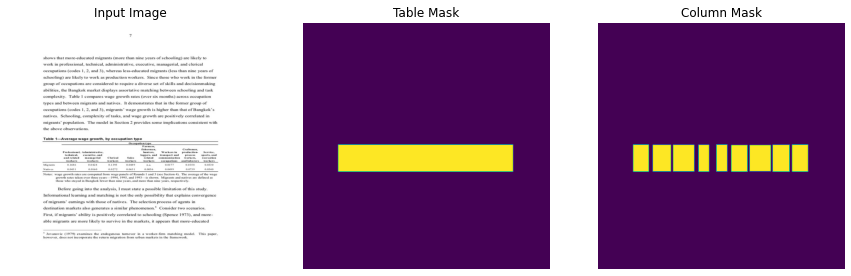

(1024, 1024, 3)


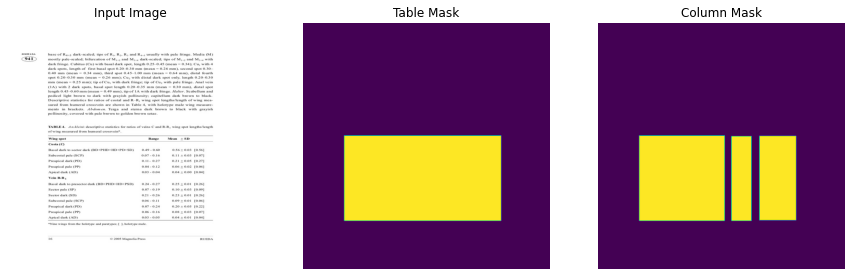

(1024, 1024, 3)


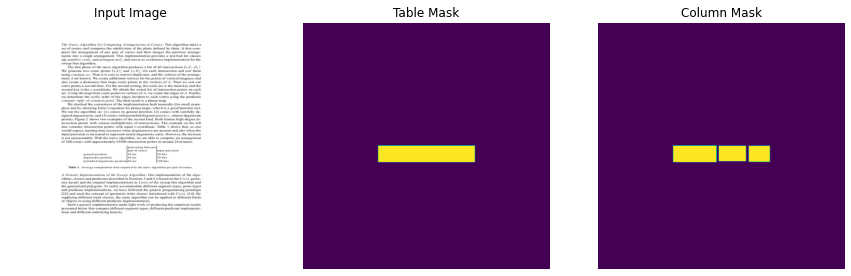

In [ ]:
for image, mask  in train.take(3):
    print(image.shape)
    display([image, mask['table_mask'], mask['column_mask']])

## **Train the Model**

In [ ]:
losses = {
    "table_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    "column_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
}

lossWeights = {"table_mask": 1.0, "column_mask": 1.0}

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-08),
              loss=losses,
              metrics=['accuracy'],
              loss_weights=lossWeights)

In [ ]:
EPOCHS = 10
VAL_SUBSPLITS = 5
VALIDATION_STEPS = test_size//BATCH_SIZE//VAL_SUBSPLITS


model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          )

Epoch 1/10
222/222 [==============================] - 365s 1s/step - loss: 1.0569 - table_mask_loss: 0.5017 - column_mask_loss: 0.5551 - table_mask_accuracy: 0.8283 - column_mask_accuracy: 0.8310 - val_loss: 0.4693 - val_table_mask_loss: 0.2292 - val_column_mask_loss: 0.2401 - val_table_mask_accuracy: 0.9238 - val_column_mask_accuracy: 0.9173
Epoch 2/10
222/222 [==============================] - 305s 1s/step - loss: 0.3799 - table_mask_loss: 0.1984 - column_mask_loss: 0.1815 - table_mask_accuracy: 0.9112 - column_mask_accuracy: 0.8992 - val_loss: 0.5049 - val_table_mask_loss: 0.2238 - val_column_mask_loss: 0.2811 - val_table_mask_accuracy: 0.9219 - val_column_mask_accuracy: 0.9002
Epoch 3/10
222/222 [==============================] - 304s 1s/step - loss: 0.3132 - table_mask_loss: 0.1600 - column_mask_loss: 0.1532 - table_mask_accuracy: 0.9291 - column_mask_accuracy: 0.9135 - val_loss: 0.7351 - val_table_mask_loss: 0.3226 - val_column_mask_loss: 0.4125 - val_table_mask_accuracy: 0.8842 

## **Model results**
We then save the model so that we can load it later

Table_mask_loss:0.1024<br>
column_mask_loss: 0.1050 <br>
table_mask_accuracy: 0.9360<br>
column_mask_accuracy: 0.8939<br>

In [ ]:
model.save('model_Tablenet')

INFO:tensorflow:Assets written to: model_Tablenet/assets


In [11]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/MARMOT/model_Tablenet/')

## **Display Prediction**

In [12]:
def create_mask(pred_mask1, pred_mask2):
  

  """Return a filter mask with the top 1 predictions
    only.

  """

  pred_mask1 = tf.argmax(pred_mask1, axis=-1)
  pred_mask1 = tf.expand_dims(pred_mask1, axis=-1)
    
  pred_mask2 = tf.argmax(pred_mask2, axis=-1)
  pred_mask2 = tf.expand_dims(pred_mask2, axis=-1)
  return pred_mask1[0], pred_mask2[0]

In [13]:
def show_predictions(dataset=None, num=1):
  """Show a sample prediction.

    Parameters
    ----------
    dataset : [type], optional
        [Input dataset, by default None
    num : int, optional
        Number of sample to show, by default 1
    """
  if dataset:

      for image, (mask1, mask2) in dataset.take(num):
            
          pred_mask1, pred_mask2 = model1.predict(image, verbose=1)
          table_mask, column_mask = create_mask(pred_mask1, pred_mask2)
          display([image[0], table_mask, column_mask])
  else:
      pred_mask1, pred_mask2 = model1.predict(sample_image, verbose=1)
      table_mask, column_mask = create_mask(pred_mask1, pred_mask2)

      display([sample_image[0], table_mask, column_mask])

1/1 [==============================] - 1s 1s/step


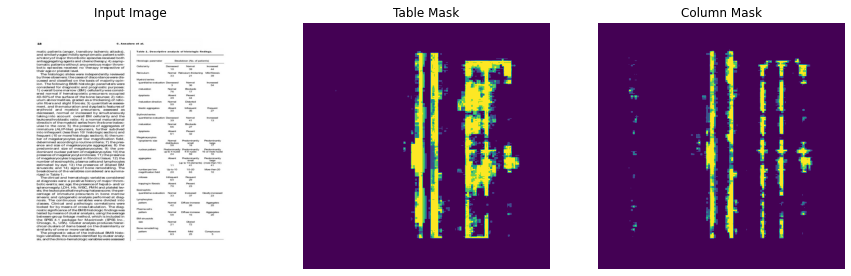

1/1 [==============================] - 1s 796ms/step


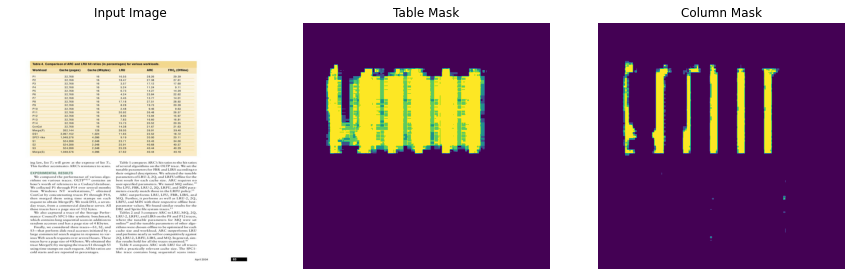

1/1 [==============================] - 1s 776ms/step


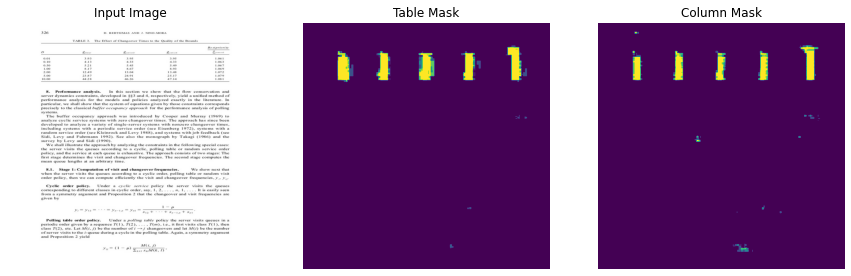

1/1 [==============================] - 1s 765ms/step


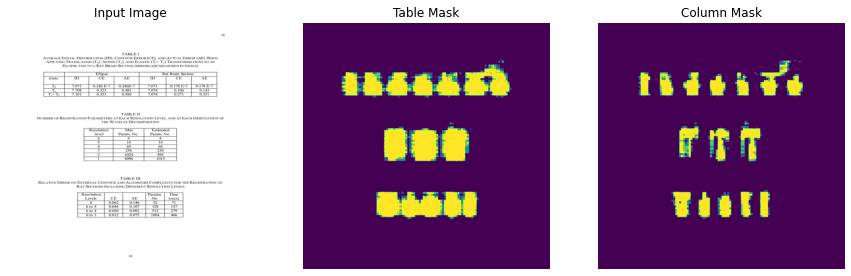

1/1 [==============================] - 1s 753ms/step


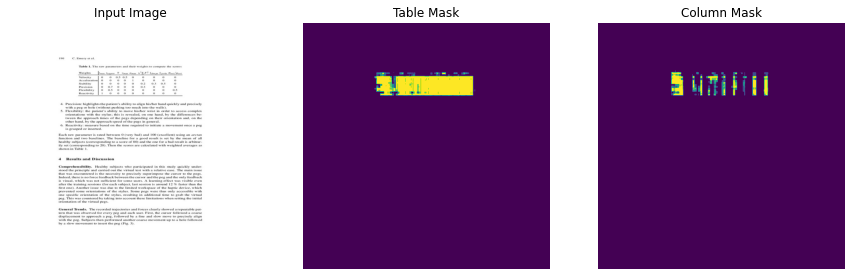

In [ ]:
show_predictions(test_dataset, 5)

## **Extract Table from the image**

In [14]:
def load_img(path):
  test_image = Image.open(path)
  test_data = tf.data.Dataset.list_files(path)
  #size = len(list(test_data))
  size = int(len(list(test_data)))
  BATCH_SIZE = 1
  test=test_data.take(size)
  test = test.map(parse_image)
  test_dataset = test.batch(BATCH_SIZE)

  return test_dataset


In [15]:
path = "/content/drive/MyDrive/MARMOT/images/10.1.1.1.2024_3.jpeg"

In [16]:
test_dataset = load_img(path)

1/1 [==============================] - 17s 17s/step


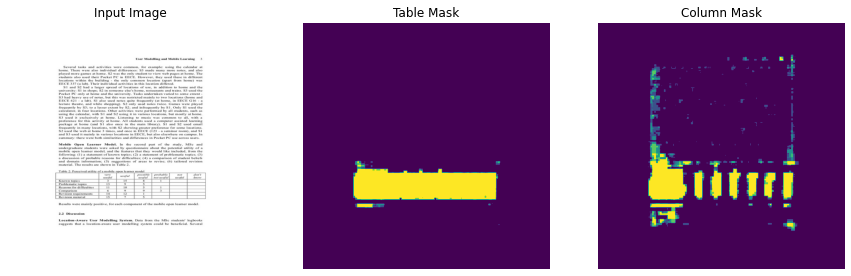

In [16]:
show_predictions(test_dataset)

In [17]:
for image, (mask1, mask2) in test_dataset:
  pred_mask1, pred_mask2 = model1.predict(image, verbose=1)
  table_mask, column_mask = create_mask(pred_mask1, pred_mask2)

1/1 [==============================] - 17s 17s/step


In [18]:
import cv2
test_image  = cv2.imread(path)# load image
#img_org = tf.keras.preprocessing.image.array_to_img(test_image)

In [19]:
img_mask = tf.keras.preprocessing.image.array_to_img(table_mask)  

#img_array = table_mask #array for the img_mask

img_array = np.array(img_mask)

In [20]:
fin = cv2.bitwise_and(test_image , test_image , mask = img_array)
# Color background white
fin[img_array==0] = 255


In [21]:
cv2.imwrite("/content/drive/MyDrive/MARMOT/appimage.jpg", fin)

True

In [22]:
import cv2
msk = cv2.imread('/content/drive/MyDrive/MARMOT/appimage.jpg')# load image


In [23]:
img_msk = tf.keras.preprocessing.image.array_to_img(msk)

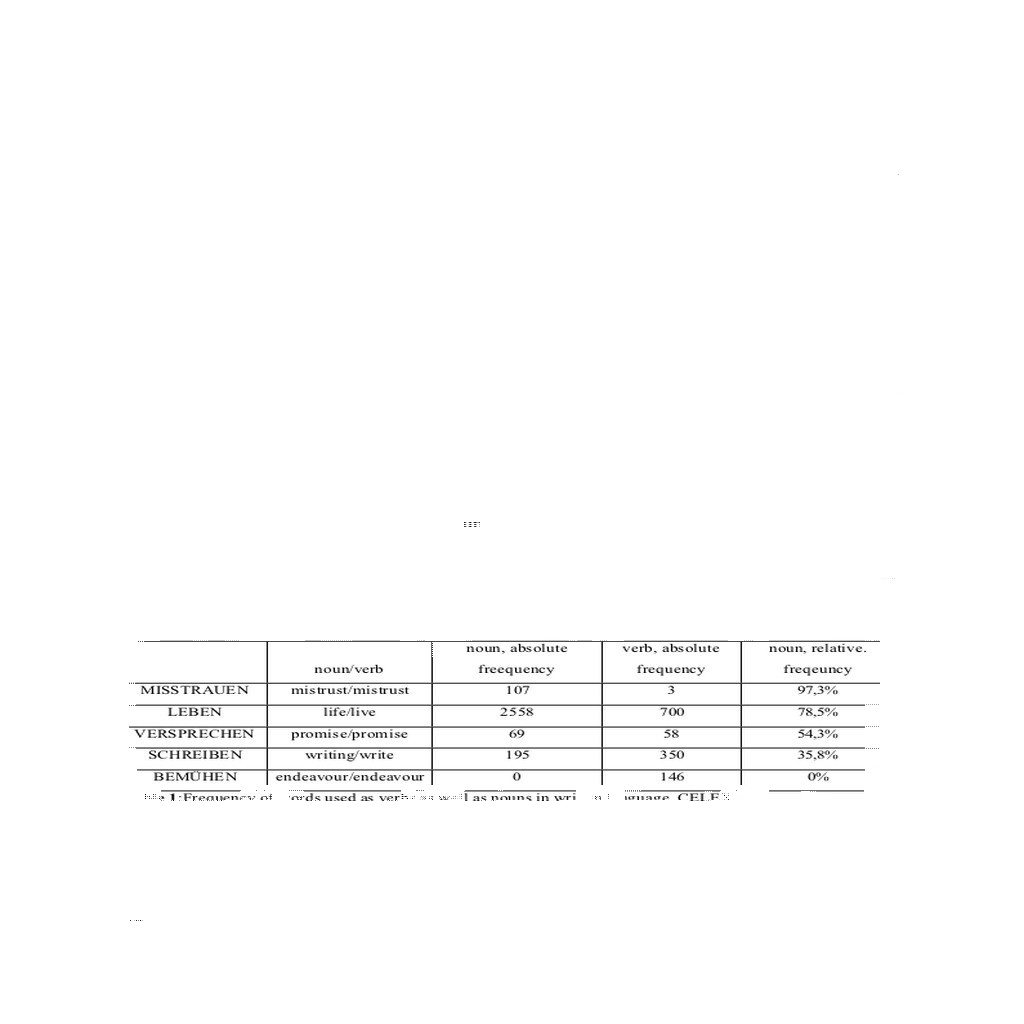

In [24]:
img_msk

## **Method 1: Extract text from table image using Pytesseract directly**

In [25]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [26]:
#https://bhadreshpsavani.medium.com/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0
#https://stackoverflow.com/questions/56404380/write-image-text-to-a-new-text-file

image_path_in_colab="/content/drive/MyDrive/MARMOT/appimage.jpg"
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

 

 

 

 

 

 

 

 

 

Roun, absolute Verb, absolute noun, relative:
noun/verb freequeney frequency freqeuney
MISSTRAUEN miswusvmiswust TOF s
LEBEN Tifelive 3558 Foo TRS
VERSPRECHEN | promiseipromise roy 3S 343%
SCHREIBEN writing write 19s 350 35%
BEMUHEN | endeavourvendeavour o 146 we

 

 

 

 

 

STbreanenry ot

‘rdw used as were

isiaes CELE



# **Method 2: Detect table contours and extract text**

In [ ]:
#https://towardsdatascience.com/a-table-detection-cell-recognition-and-text-extraction-algorithm-to-convert-tables-to-excel-files-902edcf289ec

In [37]:
###########################################################################################################
#read your file
file='/content/drive/MyDrive/MARMOT/appimage.jpg'
img = cv2.imread(file,0)
img.shape
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)



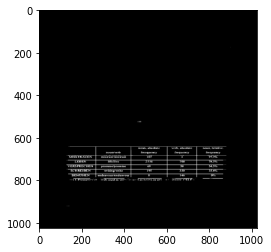

In [38]:
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('/content/drive/MyDrive/MARMOT/cv_inverted.png',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [39]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

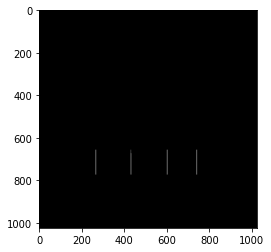

In [40]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("/Users/YOURPATH/vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

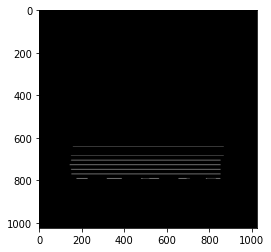

In [41]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("/Users/YOURPATH/horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

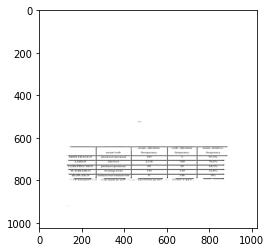

In [42]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("/Users/YOURPATH/img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [43]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [44]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
      reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
      i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

In [45]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

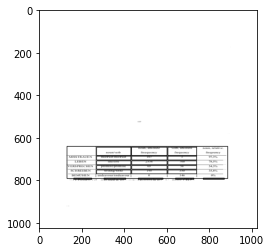

In [46]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
plotting = plt.imshow(image,cmap="gray")
plt.show()




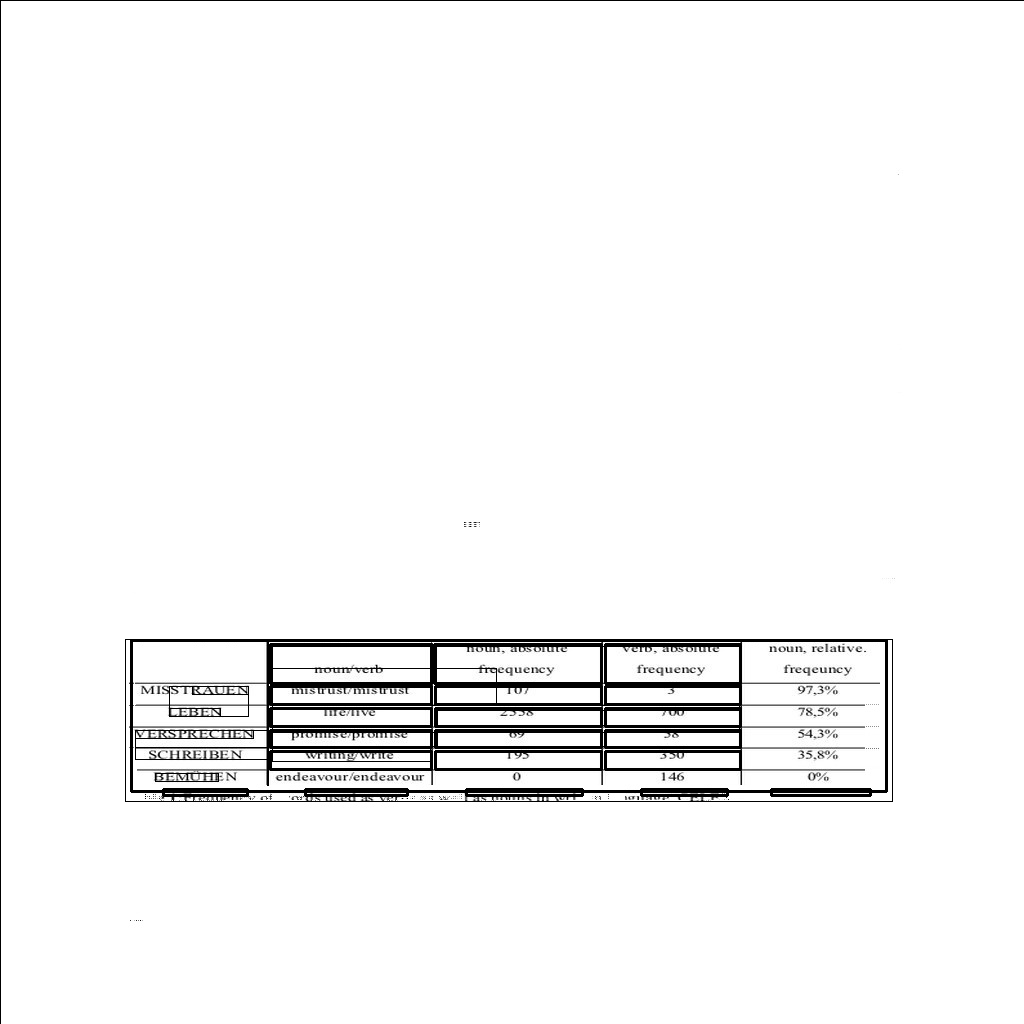

In [47]:
from pytesseract import Output

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
box1=[]
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
    box1.append([x,y,w,h])

cv2_imshow(img)

In [115]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
#print(mean)
columns.append(box[0])
previous=box[0]
for i in range(1,len(box)):
    if(box[i][1]<=previous[1]+mean/2):
        columns.append(box[i])
        previous=box[i]
        if(i==len(box)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = box[i]
        columns.append(box[i])
print("Rows")
for row in rows:
    print(row)

Rows
[[595, 647, 260, 6], [595, 664, 275, 6], [602, 713, 268, 5]]


In [158]:
total_cells=0
for i in range(len(row)):
    if len(row[i]) > total_cells:
        total_cells = len(row[i])
print(total_cells)

4


In [48]:
#################original
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)

[[771, 789, 99, 6], [641, 789, 86, 6], [466, 789, 116, 6], [305, 789, 102, 6], [163, 789, 84, 6]]
[[[131, 640, 755, 151], [605, 644, 135, 39], [434, 644, 167, 39], [270, 644, 161, 39]], [[605, 686, 135, 18], [435, 686, 166, 18], [270, 686, 161, 18], [605, 708, 135, 18], [435, 708, 166, 18], [270, 708, 161, 18], [605, 730, 135, 17], [435, 730, 166, 17], [270, 730, 161, 17], [605, 751, 135, 18], [435, 751, 166, 18], [270, 751, 161, 18]], [[771, 789, 99, 6], [641, 789, 86, 6], [466, 789, 116, 6], [305, 789, 102, 6], [163, 789, 84, 6]]]


In [49]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [50]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [74]:
center

array([418, 418, 418, 418, 418, 492, 492, 492, 492, 492, 564, 564, 564,
       564, 564, 638, 638, 638, 638, 638, 711, 711, 711, 711, 711, 711])

In [51]:
#Regarding the distance to the columns center, the boxes are arranged in respective order
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [55]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
import pytesseract
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=""
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                out=re.sub("\n","",out)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [56]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
#data.to_excel("/content/drive/MyDrive/MARMOT/output.xlsx")

    0  ...   4
0      ...    
1      ...    
2     ...   

[3 rows x 5 columns]


In [57]:
dataframe

,0,1,2,3,4
0,,noun/verb,"noun, absolutefreequency","verb, absolutefrequency",
1,,mistrust/mistrust life/live promise/promise...,107 2358 69 195,700 38 330,
2,,,,,


In [62]:
img = Image.open("/content/drive/MyDrive/MARMOT/appimage1.jpeg")

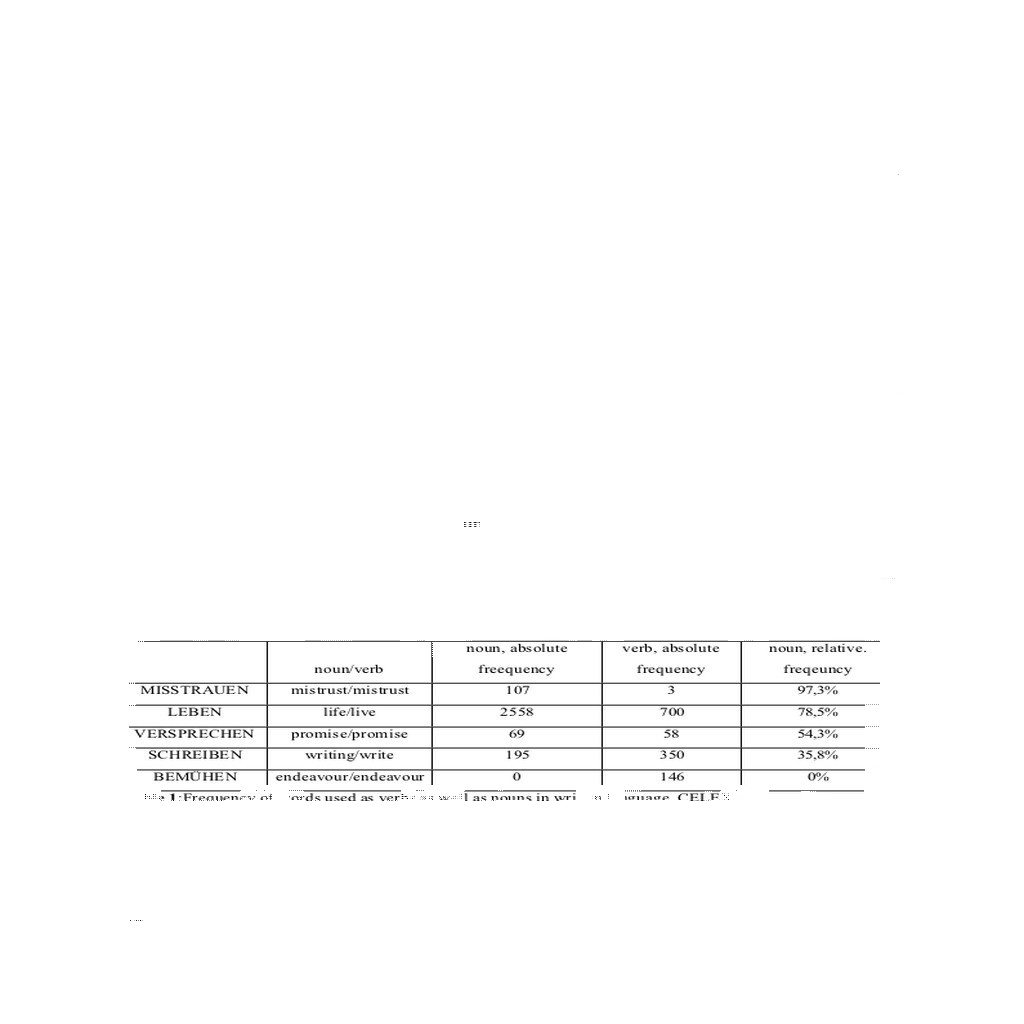

In [63]:
img

# **Conclusion**

Tried two ways of extracting text. The method 1 simpliy extracts the text from the table image whereas in method 2 we detect contours of the table text and retrieve its position and extract text from it.